In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\user\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\user\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\Users\user\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "c:\Users\user\Anaconda3\lib\site-packages\

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [44]:
df = pd.read_csv('dataset/dataset_comandos.csv')

<Axes: xlabel='target'>

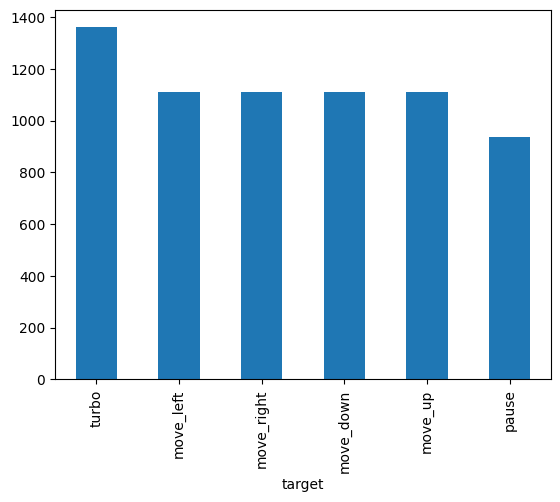

In [45]:
df['target'].value_counts().plot(kind='bar')

In [47]:
# Carregar dataset
X = df['comando']  # Features (comandos)
y = df['target']   # Target (movimentos)

# Vetorização dos comandos (transformar texto em vetores numéricos)
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Codificar o target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X_vectorized, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verificar tamanhos das divisões
print(f"Tamanho Treino: {X_train.shape[0]}")
print(f"Tamanho Validação: {X_val.shape[0]}")
print(f"Tamanho Teste: {X_test.shape[0]}")




Tamanho Treino: 4714
Tamanho Validação: 1010
Tamanho Teste: 1011


In [48]:

# Treinar o modelo com Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [49]:
# Avaliar no conjunto de validação
y_val_pred = rf_model.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))




Validation Accuracy:  1.0
              precision    recall  f1-score   support

   move_down       1.00      1.00      1.00       188
   move_left       1.00      1.00      1.00       168
  move_right       1.00      1.00      1.00       174
     move_up       1.00      1.00      1.00       175
       pause       1.00      1.00      1.00       129
       turbo       1.00      1.00      1.00       176

    accuracy                           1.00      1010
   macro avg       1.00      1.00      1.00      1010
weighted avg       1.00      1.00      1.00      1010



In [59]:
# move = rf_model.predict(vectorizer.transform(['Pare!']))
# key = label_encoder.inverse_transform(move)

# print(f"Comando: {move[0]} --> Ação prevista: {key[0]}")

Comando: 4 --> Ação prevista: pause


In [60]:
# # Avaliar no conjunto de teste

y_test_pred = rf_model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Test Accuracy:  1.0
              precision    recall  f1-score   support

   move_down       1.00      1.00      1.00       135
   move_left       1.00      1.00      1.00       152
  move_right       1.00      1.00      1.00       184
     move_up       1.00      1.00      1.00       184
       pause       1.00      1.00      1.00       136
       turbo       1.00      1.00      1.00       220

    accuracy                           1.00      1011
   macro avg       1.00      1.00      1.00      1011
weighted avg       1.00      1.00      1.00      1011



In [61]:
import joblib

# Supondo que seu modelo tenha sido treinado e esteja armazenado na variável 'modelo'

# Salvar o modelo em um arquivo
joblib.dump(rf_model, 'modelo.pkl')

# Também é uma boa ideia salvar o vectorizer e o label encoder
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']